# House Prediction Model 

Importing Libraries 

In [49]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')


Importing csv file

In [50]:
data=pd.read_csv('MagicBricks.csv')

### Analyzing Data

In [51]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


Information

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [53]:
data.value_counts()

Area     BHK  Bathroom  Furnishing      Locality                                Parking  Price     Status         Transaction   Type           Per_Sqft
750.0    2    2.0       Semi-Furnished  J R Designers Floors, Rohini Sector 24  1.0      5000000   Ready_to_move  New_Property  Apartment      6667.0      4
1000.0   3    2.0       Unfurnished     Virat Residency, Dwarka Mor             1.0      4620000   Ready_to_move  New_Property  Apartment      4620.0      3
540.0    2    2.0       Semi-Furnished  Adarsh Homes, Dwarka Mor                1.0      3000000   Ready_to_move  New_Property  Apartment      5000.0      3
950.0    3    2.0       Furnished       Uttam Nagar Floors, Uttam Nagar         1.0      4370000   Ready_to_move  New_Property  Apartment      4600.0      3
1775.0   3    3.0       Semi-Furnished  The Amaryllis, Karol Bagh               1.0      25500000  Almost_ready   New_Property  Apartment      14366.0     3
                                                               

In [54]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


#### Histogram

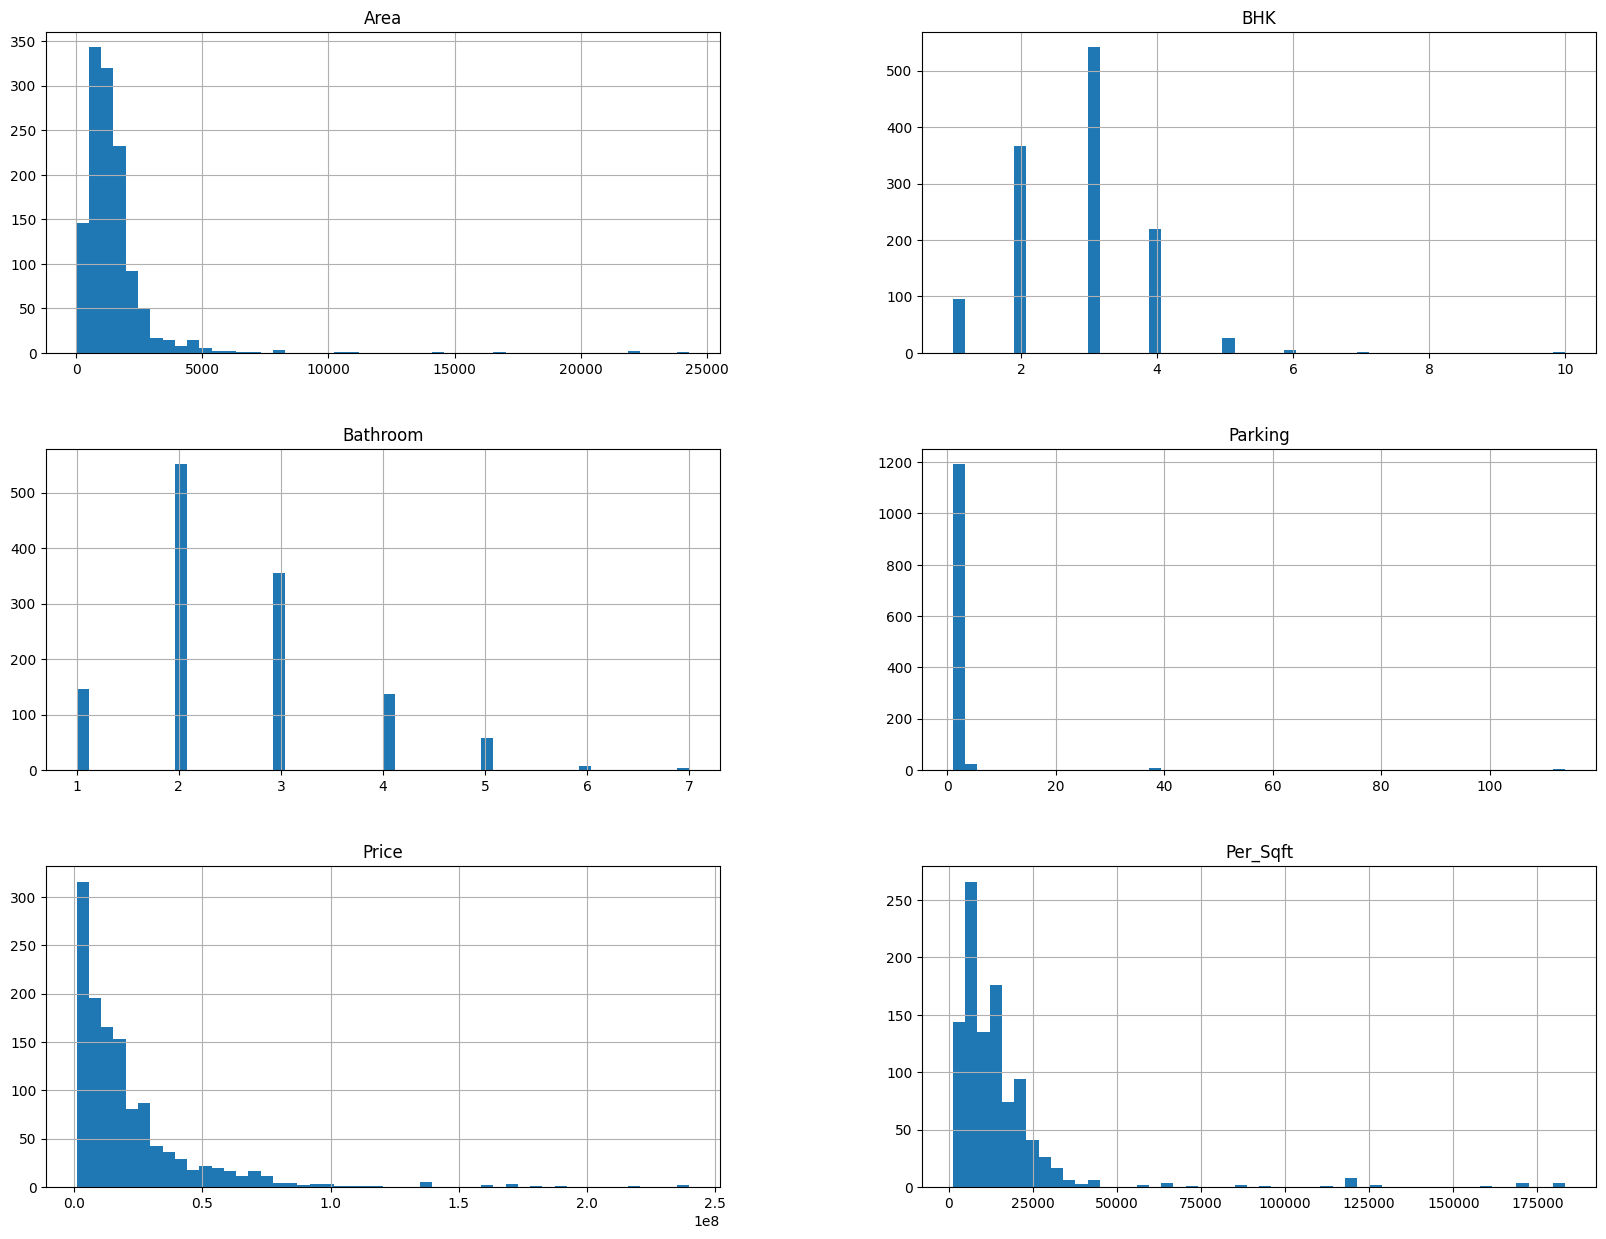

In [55]:
data.hist(bins=50,figsize=(20,15))
plt.show()

Converting Catagorical data to Numerical data

In [56]:
data['Resale']= pd.get_dummies(data['Transaction'],drop_first=True)
data['Ready_to_move']= pd.get_dummies(data['Status'],drop_first=True)
data['Builder_Floor']=pd.get_dummies(data['Type'],drop_first=True)


Dropping Unnecessary Columns

In [57]:
data = data.drop('Type', axis=1)
data = data.drop('Transaction', axis=1)
data = data.drop('Status', axis=1)
data.head()


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Per_Sqft,Resale,Ready_to_move,Builder_Floor
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,NaN,0,1,1
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6667.0,0,1,0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,6667.0,1,1,0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,6667.0,1,1,1
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,6667.0,0,1,1


Stratifing Data for "Ready_to_move" Column

In [58]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(data,data['Ready_to_move']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

strat_test_set['Ready_to_move'].value_counts()

1    296
0     19
Name: Ready_to_move, dtype: int64

### Looking For Corelations 

In [59]:
cor_matrix = data.corr()
cor_matrix['Price'].sort_values(ascending=False)

Price            1.000000
Bathroom         0.728108
Area             0.580836
BHK              0.571523
Per_Sqft         0.322859
Builder_Floor    0.113964
Parking         -0.000448
Ready_to_move   -0.186129
Resale          -0.218234
Name: Price, dtype: float64

array([[<AxesSubplot: xlabel='Price', ylabel='Price'>,
        <AxesSubplot: xlabel='Bathroom', ylabel='Price'>,
        <AxesSubplot: xlabel='Area', ylabel='Price'>,
        <AxesSubplot: xlabel='BHK', ylabel='Price'>,
        <AxesSubplot: xlabel='Per_Sqft', ylabel='Price'>,
        <AxesSubplot: xlabel='Parking', ylabel='Price'>],
       [<AxesSubplot: xlabel='Price', ylabel='Bathroom'>,
        <AxesSubplot: xlabel='Bathroom', ylabel='Bathroom'>,
        <AxesSubplot: xlabel='Area', ylabel='Bathroom'>,
        <AxesSubplot: xlabel='BHK', ylabel='Bathroom'>,
        <AxesSubplot: xlabel='Per_Sqft', ylabel='Bathroom'>,
        <AxesSubplot: xlabel='Parking', ylabel='Bathroom'>],
       [<AxesSubplot: xlabel='Price', ylabel='Area'>,
        <AxesSubplot: xlabel='Bathroom', ylabel='Area'>,
        <AxesSubplot: xlabel='Area', ylabel='Area'>,
        <AxesSubplot: xlabel='BHK', ylabel='Area'>,
        <AxesSubplot: xlabel='Per_Sqft', ylabel='Area'>,
        <AxesSubplot: xlabel='Parking

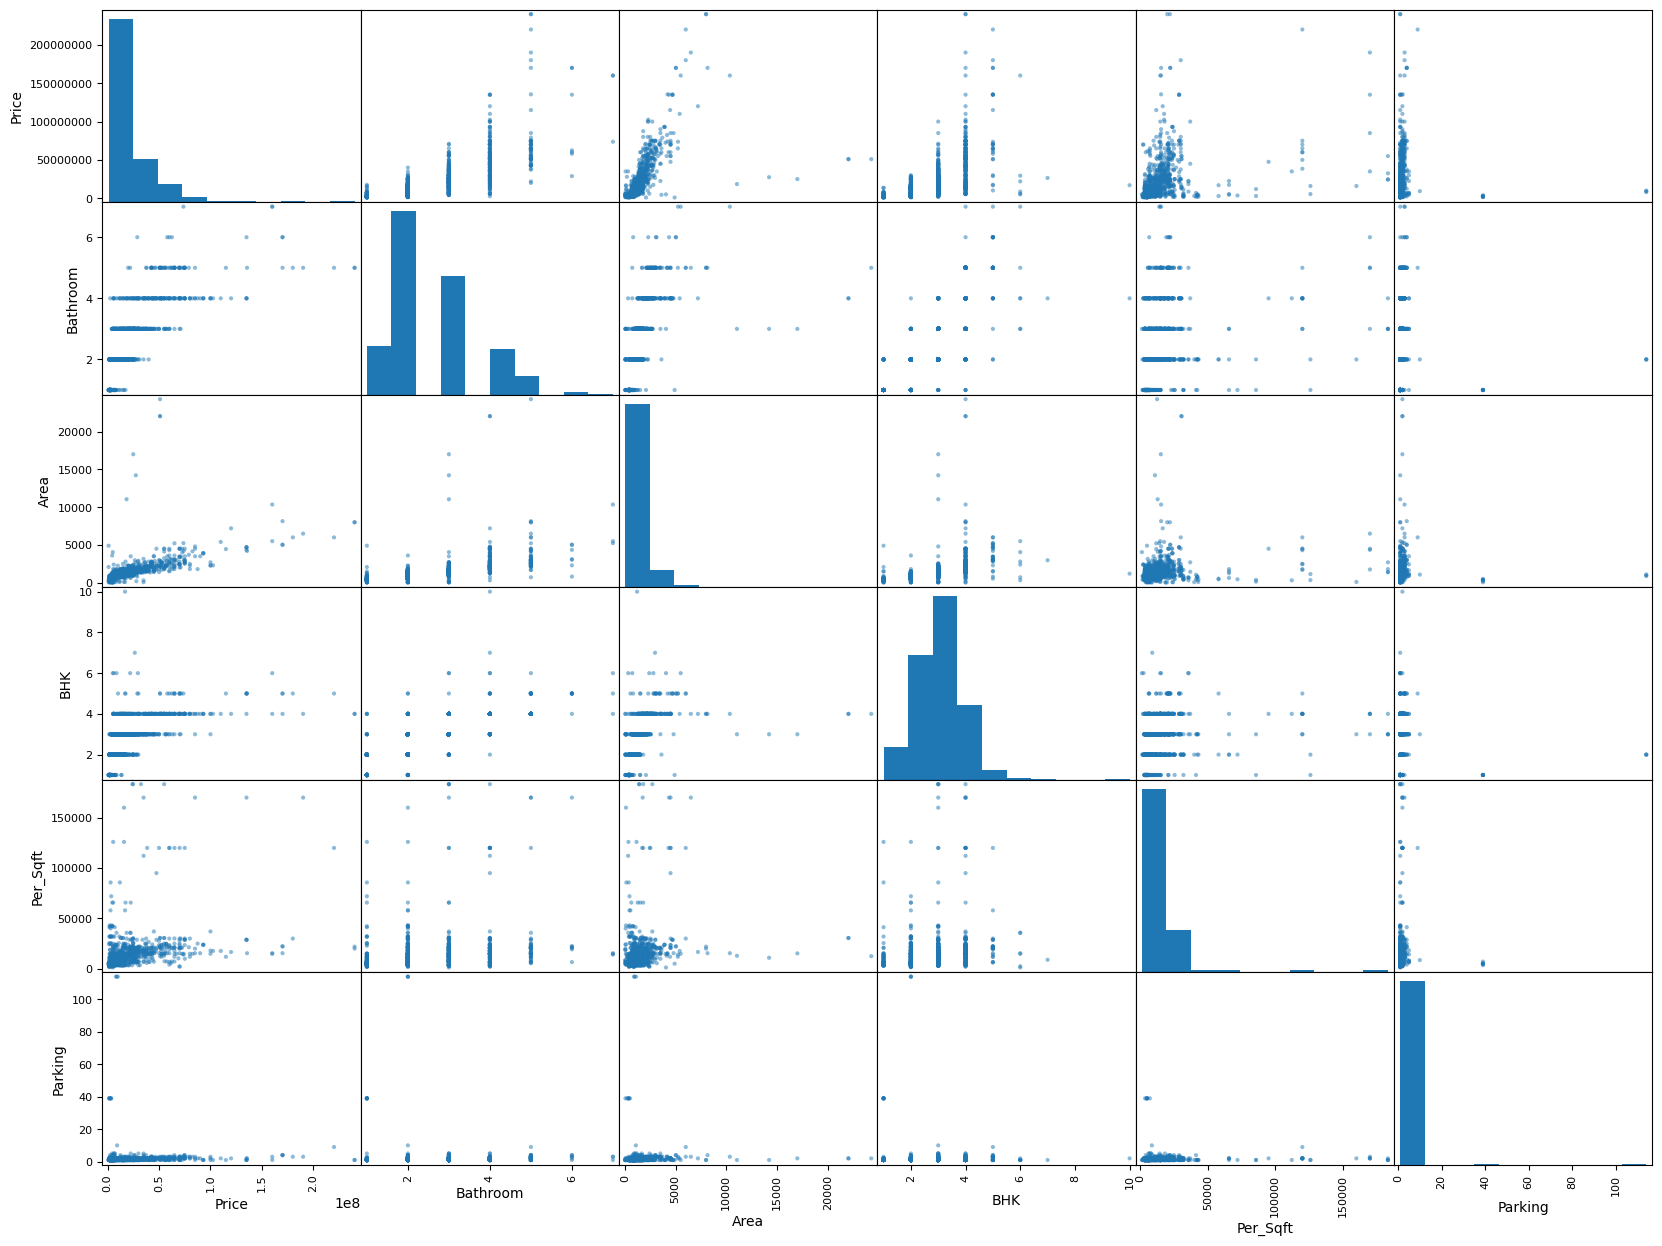

In [60]:
from pandas.plotting import scatter_matrix
attributes = ["Price", "Bathroom", "Area", "BHK", "Per_Sqft", "Parking"]
scatter_matrix(data[attributes], figsize=(20,15))

In [61]:
data['PArea'] = data['Price'] / data['Area']
data['PArea']

0        8125.000000
1        6666.666667
2       16315.789474
3        7000.000000
4        9538.461538
            ...     
1254    13355.998057
1255    11904.761905
1256    20000.000000
1257    11616.161616
1258     1674.208145
Name: PArea, Length: 1259, dtype: float64

In [62]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Per_Sqft,Resale,Ready_to_move,Builder_Floor,PArea
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,NaN,0,1,1,8125.000000
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6667.0,0,1,0,6666.666667
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,6667.0,1,1,0,16315.789474
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,6667.0,1,1,1,7000.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,6667.0,0,1,1,9538.461538


In [63]:
cor_matrix = data.corr()
cor_matrix['Price'].sort_values(ascending=False)

Price            1.000000
Bathroom         0.728108
Area             0.580836
BHK              0.571523
Per_Sqft         0.322859
PArea            0.245597
Builder_Floor    0.113964
Parking         -0.000448
Ready_to_move   -0.186129
Resale          -0.218234
Name: Price, dtype: float64

<AxesSubplot: xlabel='PArea', ylabel='Price'>

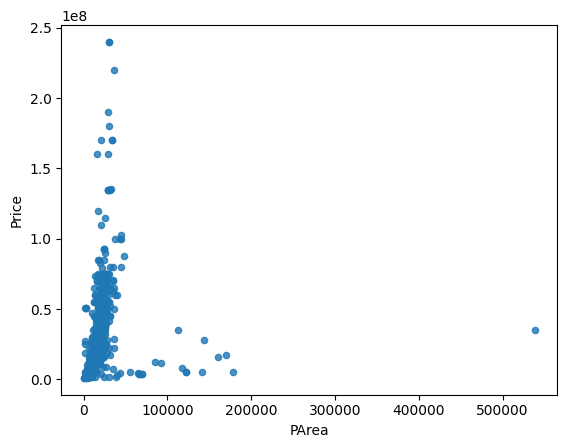

In [64]:
data.plot(kind='scatter',x='PArea', y='Price', alpha=0.8)

Catplot for all column 

In [65]:
# pltno=0
# for column in data:
#     if pltno<=6:
#         sns.catplot(data[column],color='Pink')
#         plt.xlabel(column,fontsize=10)
#     pltno+=1

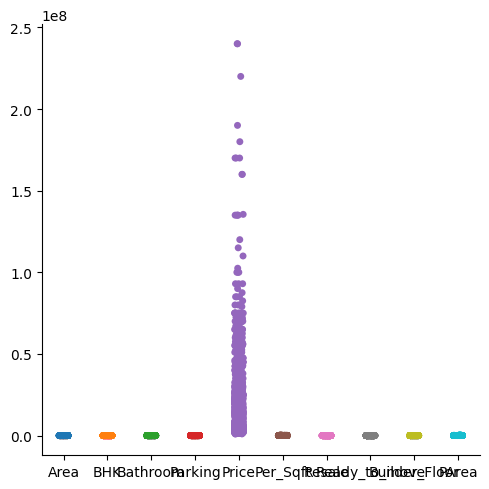

In [66]:
sns.catplot(data)

## Data Cleaning

Removing outliers from "Area"

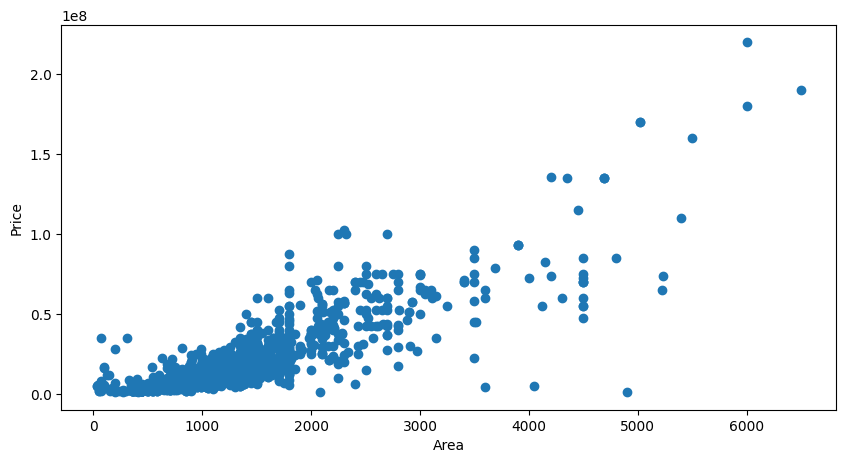

In [67]:
data.drop(data[data['Area'] >= 7000].index, inplace = True)

plt.figure(figsize=(10,5))
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(data.Area,data.Price)

Removing outliers from "Bathroom"

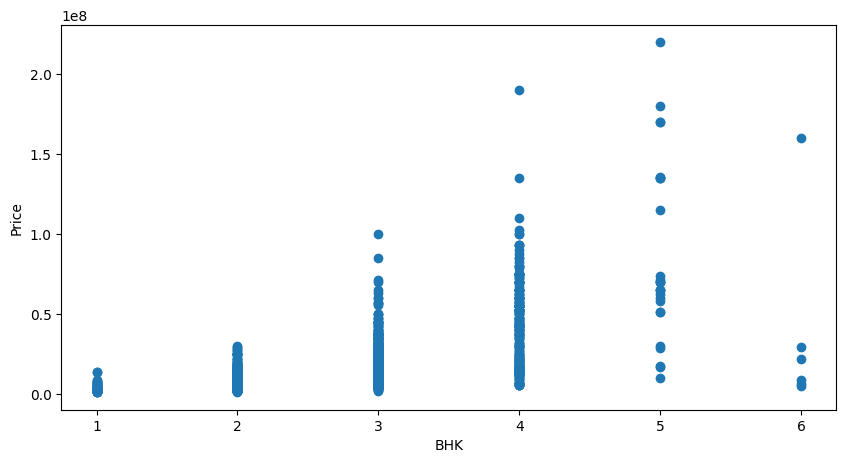

In [68]:
data.drop(data[data['BHK'] > 6].index, inplace = True)
plt.figure(figsize=(10,5))
plt.xlabel('BHK')
plt.ylabel('Price')
plt.scatter(data.BHK,data.Price)

Removing Outliers from "PerSqFt"

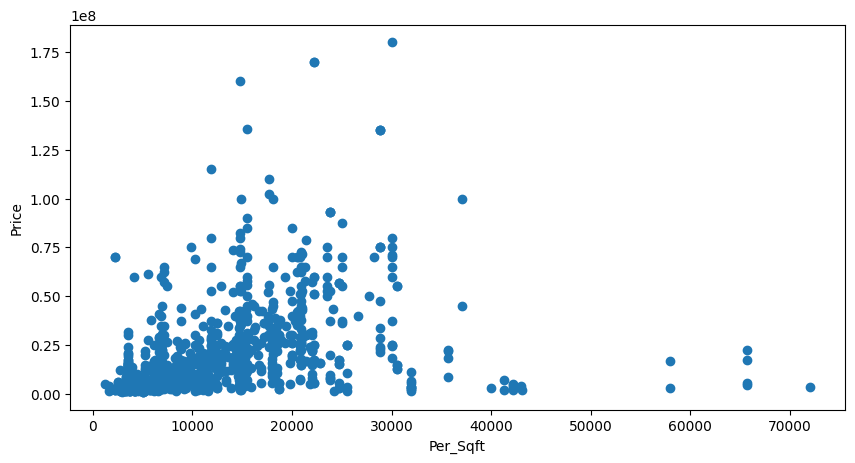

In [69]:
data.drop(data[data['Per_Sqft'] > 75000].index, inplace = True)
plt.figure(figsize=(10,5))
plt.xlabel('Per_Sqft')
plt.ylabel('Price')
plt.scatter(data.Per_Sqft,data.Price)

Removing Outliers from "Parking"

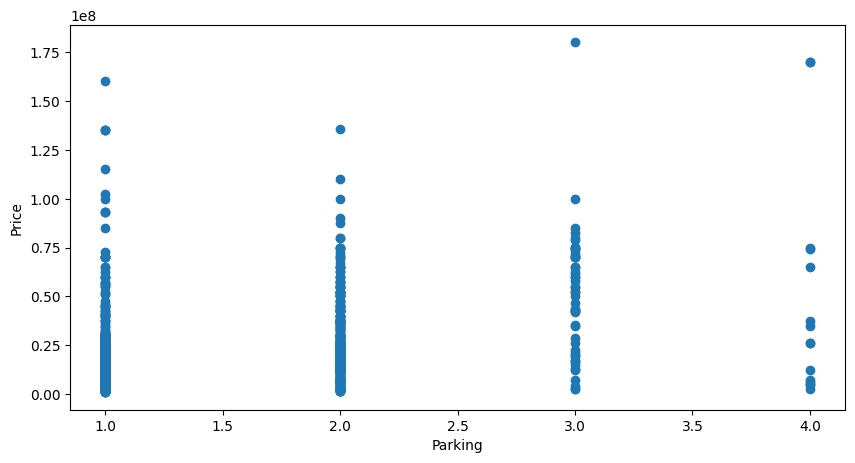

In [70]:
data.drop(data[data['Parking'] >= 5].index, inplace = True)
plt.figure(figsize=(10,5))
plt.xlabel('Parking')
plt.ylabel('Price')
plt.scatter(data.Parking,data.Price)

Removing Outliers from "Builder_Floor"

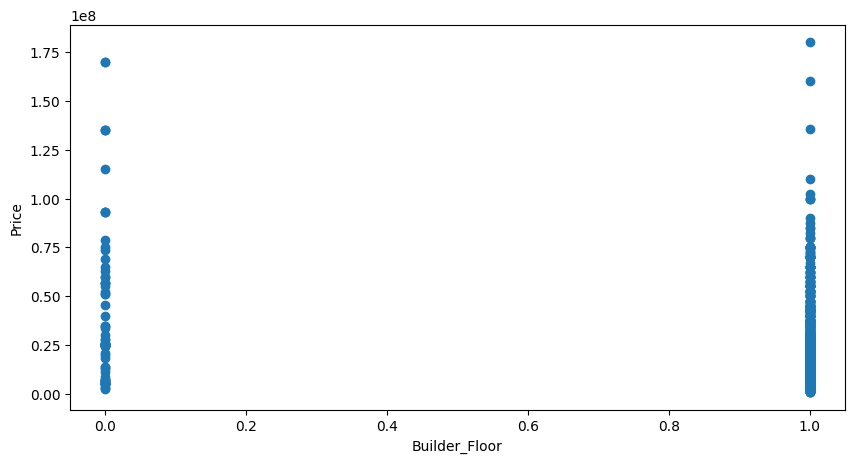

In [71]:
plt.figure(figsize=(10,5))
plt.xlabel('Builder_Floor')
plt.ylabel('Price')
plt.scatter(data.Ready_to_move,data.Price)

In [72]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Resale,Ready_to_move,Builder_Floor,PArea
count,1205.000000,1205.000000,1203.000000,1172.000000,1.205000e+03,968.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,1338.365853,2.778423,2.529510,1.401877,2.000593e+07,12896.908058,0.624896,0.940249,0.521162,14300.495076
std,834.141470,0.914918,1.011458,0.637376,2.174760e+07,9075.767112,0.484351,0.237123,0.499759,19992.939780
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000,0.000000,0.000000,0.000000,204.081633
25%,800.000000,2.000000,2.000000,1.000000,5.600000e+06,6154.000000,0.000000,1.000000,0.000000,6750.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.400000e+07,11111.000000,1.000000,1.000000,1.000000,11666.666667
75%,1640.000000,3.000000,3.000000,2.000000,2.500000e+07,17677.000000,1.000000,1.000000,1.000000,17416.666667
max,6000.000000,6.000000,7.000000,4.000000,1.800000e+08,72000.000000,1.000000,1.000000,1.000000,538461.538462


#### Filling missing Values with mean

In [73]:
data.fillna(data.mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1257
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           1205 non-null   float64
 1   BHK            1205 non-null   int64  
 2   Bathroom       1205 non-null   float64
 3   Furnishing     1200 non-null   object 
 4   Locality       1205 non-null   object 
 5   Parking        1205 non-null   float64
 6   Price          1205 non-null   int64  
 7   Per_Sqft       1205 non-null   float64
 8   Resale         1205 non-null   uint8  
 9   Ready_to_move  1205 non-null   uint8  
 10  Builder_Floor  1205 non-null   uint8  
 11  PArea          1205 non-null   float64
dtypes: float64(5), int64(2), object(2), uint8(3)
memory usage: 97.7+ KB


### Train Test Splitting

In [74]:
train_set, test_set = train_test_split(data, test_size=.25, random_state=42)
print(f"Rows in train set : {len(train_set)} \nRows in test set: {len(test_set)}")

Rows in train set : 903 
Rows in test set: 302


# Model with Linear Regression

In [75]:
from sklearn import model_selection 
linear = LinearRegression()
data.dropna(inplace=True)
X=np.array(data[['Area','BHK','Per_Sqft','Bathroom','Parking','Resale','Ready_to_move','Builder_Floor']])
y=np.array(data.Price)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
linear.fit(X_train,y_train)
Y_pred = linear.predict(X_test)
print(f"Accuracy of Test Data is {round(linear.score(X_test, y_test)*100,2)}%")
print(f"Accuracy of Training Data is {round(linear.score(X_train, y_train)*100,2)}%")

Accuracy of Test Data is 77.22%
Accuracy of Training Data is 76.7%


# Model with Cross Validation

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Load the dataset
X=np.array(data[['Area','BHK','Per_Sqft','Bathroom','Parking','Resale','Ready_to_move','Builder_Floor']])
y=np.array(data.Price)

model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv)
print("Average Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average Accuracy: 0.75 (+/- 0.09)
